#Homework 1: kNN (20pt)
In this HW, you will write the $k$ Nearest Neighbors algorithm and run it on the synthetical data. Then, you will use the built-in function from *sklearn* library.

#Part I. Vanilla $k$NN (17.5pt)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
from mlxtend.plotting import plot_decision_regions
import sklearn.model_selection as ms
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate synthetic dataset with 2 classes
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=31)

1. (0.5pt) Check the shapes of $X$ and $y$

In [3]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


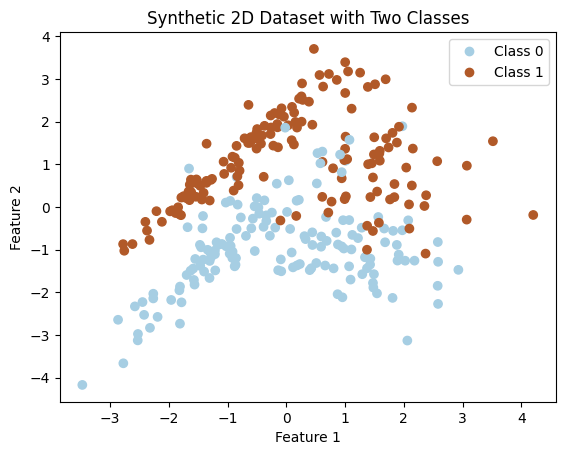

In [4]:
# Plot the synthetic dataset
scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0], labels=['Class 0', 'Class 1'])

2. (1pt) Split the data into train and test sets. You can use a built-in [function train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn. (To get the same result as in the lecture slides, use the parameters from the example in the description of the function.)

In [5]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.33, random_state=42)

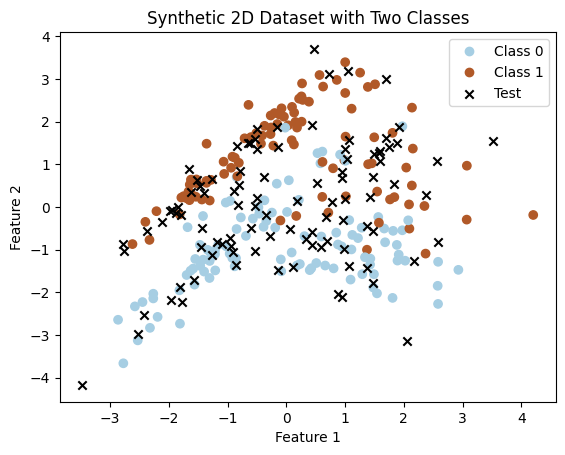

In [6]:
# Plot the synthetic dataset again
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c='black', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0]+[scatter_test], labels=['Class 0', 'Class 1', 'Test'])

3. (9pt) Fill-in the functions *compute_distances_two_loops*, *compute_distances_one_loop*, and *predict_labels* of the followng class. Use $L_1$ (Manhattan) distance:
$$
d(x,\ x^{(i)}) =\sum_{j=1}^{d} |x_j-x^{(i)}_j|.
$$

In [7]:
class kNNClassifier:
  def __init__(self, k=1, n_loops=2):
     self.k = k
     self.n_loops = n_loops

  def fit(self, X, y):
    self.train_X = X
    self.train_y = y

  def predict(self, X):
    """
    X np array (n_samples, n_features)
    returns predicted class for each sample: np array (n_samples)
    """
    if self.n_loops == 2:
      distances = self.compute_distances_two_loops(X)
    elif self.n_loops == 1:
      distances = self.compute_distances_one_loop(X)
    return self.predict_labels(distances)

  def compute_distances_two_loops(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    distances = []

    for i in X:
        row_distances = []
        for j in self.train_X:
            distance = np.sum(np.abs(i - j))
            row_distances.append(distance)
        distances.append(row_distances)

    return np.array(distances)

  def compute_distances_one_loop(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    distances = []

    for i in X:
      distance = np.sum((np.abs(self.train_X - i)), axis = 1)
      distances.append(distance)

    return np.array(distances)


  def predict_labels(self, distances):
    """
    distances: np array (n_test_samples, n_train_samples)
    output: np array (n_test_samples,)
    """
    predicted_labels = []

    for row in distances:
        k_nearest_indices = np.argsort(row)[:self.k]
        k_nearest_labels = self.train_y[k_nearest_indices]

        #count the most
        class_counts = Counter(k_nearest_labels)
        most_common_label = class_counts.most_common(1)[0][0]
        predicted_labels.append(most_common_label)

    return np.array(predicted_labels)



4. Fit the model with 2 for loops (one neighbor)

In [8]:
# create an object of the class above
clf_2 = kNNClassifier()

In [9]:
# fit the model on the training data
start_time = time.time()
clf_2.fit(X_train,y_train)
end_time = time.time()
end_time - start_time

0.00012373924255371094

5. Fit the model with 1 for loop

In [10]:
# create an object of the class above
clf_1 = kNNClassifier(n_loops=1)

In [11]:
# fit the model on the training data
start_time = time.time()
clf_1.fit(X_train,y_train)
end_time = time.time()
end_time - start_time

0.0001068115234375

6a). (0.5pt) Make a prediction on the points with coordinates $(0, -2)$

In [12]:
clf_1.predict([np.array([0, -2])])

array([0])

6b). (0.5pt) Make a prediction on the points with coordinates $(0, 2)$

In [13]:
clf_2.predict([np.array([0, 2])])

array([1])

7. Plot the decision boundary. You can use function [plot_decision_regions](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions)

<Axes: >

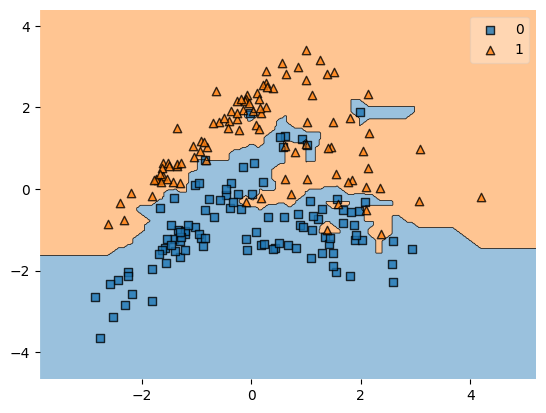

In [14]:
plot_decision_regions(X_train,y_train,clf_1)

8. (2.5pt) Now, use the built-in class [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Think about what parameter to use in order to get the same plot as above.

In [15]:
clf_3 = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')

In [16]:
# fit the model on the training data
start_time = time.time()
clf_3.fit(X_train,y_train)
end_time = time.time()
end_time - start_time

0.0036170482635498047

<Axes: >

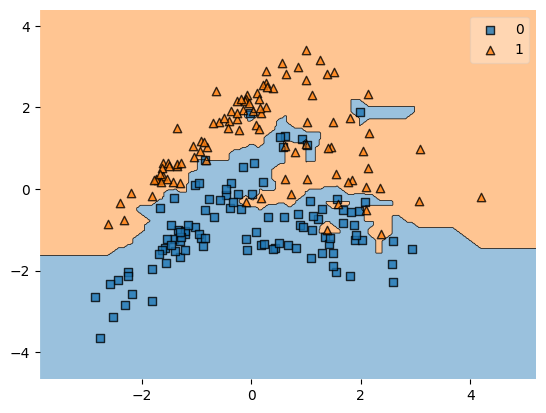

In [17]:
plot_decision_regions(X_train,y_train,clf_3)

9. (3pt) Choose $k.$  Write a for loop over 40 values of $k,$ for every $k$ train the fastest model on the train data and make prediction on the train and on the test data and store the accuracy on both sets. Plot the curves similar to ones in Lecture 2. To calculate accuracy you can use function [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).  

In [18]:
train_set = []
test_set = []
x_axis = []

for k in range(1, 41):
  clf_4 = KNeighborsClassifier(k, metric = 'manhattan')
  # fit the model on the training data
  clf_4.fit(X_train,y_train)

  train_set.append(accuracy_score(y_train, clf_4.predict(X_train)))
  test_set.append(accuracy_score(y_test, clf_4.predict(X_test)))
  x_axis.append(k)


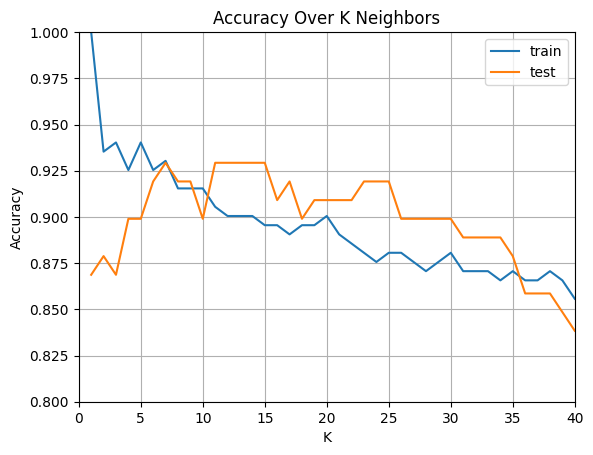

In [19]:
plt.plot(x_axis, train_set, label="train")
plt.plot(x_axis, test_set, label="test")

plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title("Accuracy Over K Neighbors")
plt.grid(True)
plt.legend(loc="upper right")


plt.axis([0, 40, 0.8, 1])
plt.show()

10. For the 'best' $k$ plot the desicion boundary.

<Axes: >

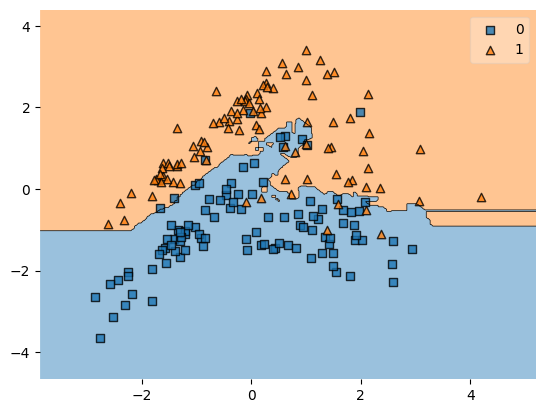

In [28]:
clf_best = KNeighborsClassifier(7, metric = 'manhattan')
clf_best.fit(X_train,y_train)
plot_decision_regions(X_train,y_train,clf_best)

11. (0.5pt) Does the algorithm this this $k$ do a good job?

Yes, it does a pretty good job of categorizing them with $k$=7.

#Part II. Weighted $k$NN (2.5pt)

1. (1.5pt) Modify the *predict_labels* function so that the score for class $c$ is calculated as follows:
$$
q(x)=\sum_{i=1}^{k}[y^{(i)}=c] \cdot \frac{1}{1+d(x,\ x^{(i)})}
$$
and the class with highest value of $q(x)$ is chosen as the label.

In [21]:
class kNNClassifier_w:
  def __init__(self, k=1):
     self.k = k

  def fit(self, X, y):
    self.train_X = X
    self.train_y = y

  def predict(self, X):
    """
    X np array (n_samples, n_features)
    returns predicted class for each sample: np array (n_samples)
    """
    distances = self.compute_distances(X)
    return self.predict_labels(distances)

  def compute_distances(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    distances = []

    for i in X:
      distance = np.sum((np.abs(self.train_X - i)), axis = 1)
      distances.append(distance)

    return np.array(distances)

  def predict_labels(self, distances):
    predicted_labels = []
    row_counter = -1

    for row in distances:
      row_counter += 1
      k_nearest_indices = np.argsort(row)[:self.k]
      k_nearest_labels = self.train_y[k_nearest_indices]

      #determine weighted results for each class
      weighted_class_0 = 0
      weighted_class_1 = 0
      for element in k_nearest_indices:
        k_weighted_neighbor = (1.0 / (1.0 + distances[row_counter][element]))
        if (self.train_y[element] == 1):
          weighted_class_1 += k_weighted_neighbor
        elif (self.train_y[element] == 0):
          weighted_class_0 += k_weighted_neighbor

      #pick which weighted class had more impact and assign the label as it
      if (weighted_class_1 >= weighted_class_0):
        predicted_labels.append(1)
      elif (weighted_class_1 < weighted_class_0):
        predicted_labels.append(0)

    return np.array(predicted_labels)


2. Run this algorithm for $k=3$ and plot the desicion boundary.

In [22]:
clf_w = kNNClassifier_w(k=3)

In [23]:
clf_w.fit(X_train,y_train)

<Axes: >

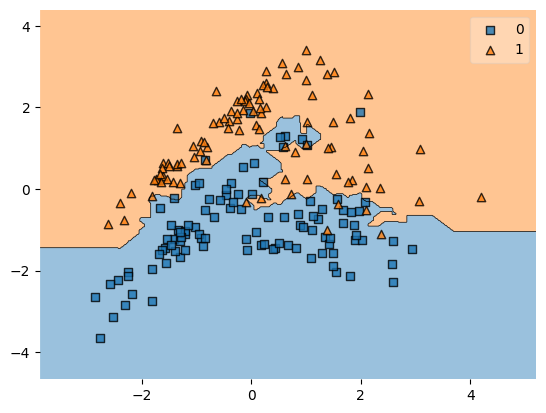

In [24]:
plot_decision_regions(X_train,y_train,clf_w)

3. (1pt) Use the buit-in algorithm with collable function

In [25]:
def func(d):
  return sum(1/(1+d))

In [26]:
clf_wk = KNeighborsClassifier(3, metric = 'manhattan', weights=func)
clf_wk.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                     weights=<function func at 0x7abdfd444280>)

4. Does the desicion boundary look the same? You can also compare it with vanilla algorithm.

<Axes: >

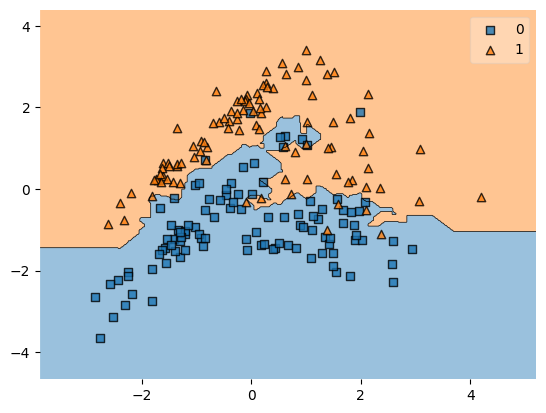

In [27]:
plot_decision_regions(X_train,y_train,clf_wk)

# Yes it looks exactly the same.